

## Unsupervised Machine Learning (ML) -- Clustering Algorithms Overview


In unsupervised machine learning, Clustering is a technique which groups data points into clusters based on the similarity of information available for the data points in the dataset. The data points belonging to the same clusters are similar to each other in some ways while the data points belonging to different clusters are dissimilar


There are different approaches and algorithms to perform the clustering tasks whcih can be divided broadly into three sub-categories :
 - Partition-based clustering :  e.g KMeans
 
 - Density-based clustering :- e.g Density-based spatial clustering of application with noise (DBSCAN) 
 
 - Hierarchical Clustering : e.g Agglomerative, Divisive


__Purpose:__
The purpose of this exercise is to learn how to use an unsupervised learning algorithm, **K-means** ,  **DBSCAN**, and **Hierarchical Clustering Algorithm (HCA)**  using sklearn.   

__At the end of this lab you will be able to:__
> 1. Run a K-means, DBSCAN, and HCA algorithm
> 2. Understand what parameters are customizable for the K-means and DBSCAN algorithm.
> 3. Know how to use the inertia Curve and Silhouette Coefficient Curve to determine the optimal number of clusters in KMeans Algorithm.

### K-Means Clustering Algorithm Overview

**K-means** is one of the most basic and popular unsupervised machine learning clustering algorithms.  It relies on finding cluster centers to group data points based on minimizing the sum of squared errors between each datapoint and its cluster center.  
**K-means** algorithim tries to split data in K ( a predefined number) clusters, according to the distance of each data point to something called Centroid.   The objective of K-means is simple : group similar data points togeather and discover underlying patterns. A cluster refers to a collection of data points agrregated together becuase of certain similarities. 

In [195]:
# import the required Python Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

K-means clustering is one of the most simple clustering algorithms.  One of the limitations is that it depends on the starting point of the clusters, and the number of clusters need to be defined beforehand.

### Cluster starting points
This function allow to display data in two dimensions to highlighs the clusters in given dataset.

In [196]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(Independent_features,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(Independent_features[:,0],Independent_features[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(Independent_features[km.labels_==i,0],Independent_features[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Synthetic Data Generation for KMean, Kmedian, and DBSCAN Models


### Data

Let's create a new dataset that visually consists on a few clusters and try to group them.

In [197]:
# Synthetic dataset to create the 3 clusters dataset
#n_samples =1000
#n_bins = 4
#centers = [[0.5, 2], [-1, -1], [1.5, -1]]
# Create datset
#Independent_features Target_y= make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0, centers=centers, shuffle=False, random_state=0)
#display_cluster(Independent_features)   ## display with display funtion

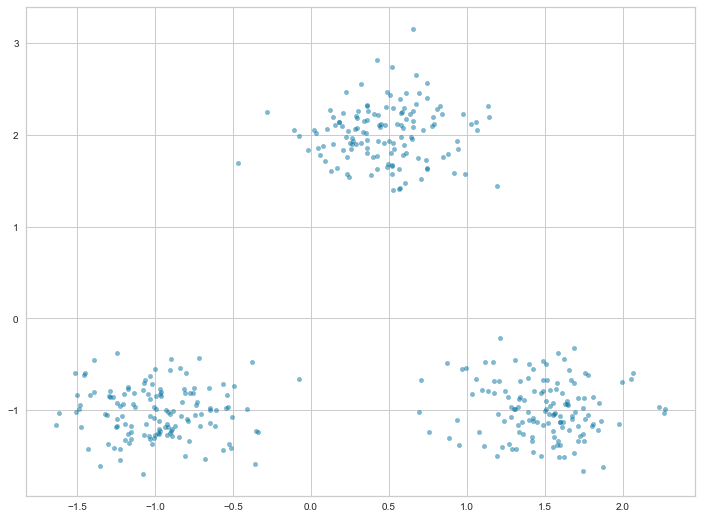

In [198]:
# Synthetic dataset to create the 3 clusters dataset
n_samples =400
n_bins = 3 
centers = [[0.5, 2], [-1, -1], [1.5, -1]]
# Create datset
Independent_features, Target_y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=0.3, centers=centers, shuffle=False, random_state=42)
plt.figure(figsize=(12,9))
display_cluster(Independent_features)   ## display with display funtion


In [199]:
Independent_features

array([[ 0.64901425,  1.95852071],
       [ 0.69430656,  2.45690896],
       [ 0.42975399,  1.92975891],
       [ 0.97376384,  2.23023042],
       [ 0.35915768,  2.16276801],
       [ 0.36097469,  1.86028107],
       [ 0.57258868,  1.42601593],
       [-0.01747535,  1.83131374],
       [ 0.19615066,  2.0942742 ],
       [ 0.22759278,  1.57630889],
       [ 0.93969463,  1.93226711],
       [ 0.52025846,  1.57257554],
       [ 0.33668518,  2.03327678],
       [ 0.15470193,  2.11270941],
       [ 0.31980839,  1.91249188],
       [ 0.31948802,  2.55568346],
       [ 0.49595083,  1.68268672],
       [ 0.74676347,  1.63374691],
       [ 0.56265908,  1.41209896],
       [ 0.10154419,  2.05905837],
       [ 0.72153997,  2.05141048],
       [ 0.46530552,  1.90966889],
       [ 0.0564434 ,  1.78404674],
       [ 0.36180837,  2.31713667],
       [ 0.60308549,  1.47108795],
       [ 0.59722519,  1.88447532],
       [ 0.2969234 ,  2.18350289],
       [ 0.80929986,  2.27938404],
       [ 0.24823474,

In [200]:
Target_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [201]:
Independent_features.shape, Target_y.shape

((400, 2), (400,))

How many clusters do you observe?

Let's run K-means with seven clusters.

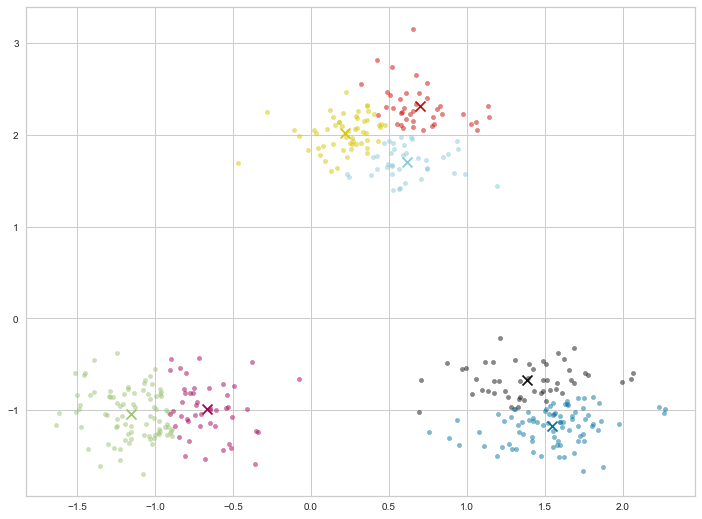

In [202]:
num_clusters = 7
kMeanModel = KMeans(n_clusters=num_clusters)
kMeanModel.fit(X)
plt.figure(figsize=(12,9))
plt.grid(True)
display_cluster(Independent_features,kMeanModel,num_clusters)

Now let's re-run the algorithm with four clusters.

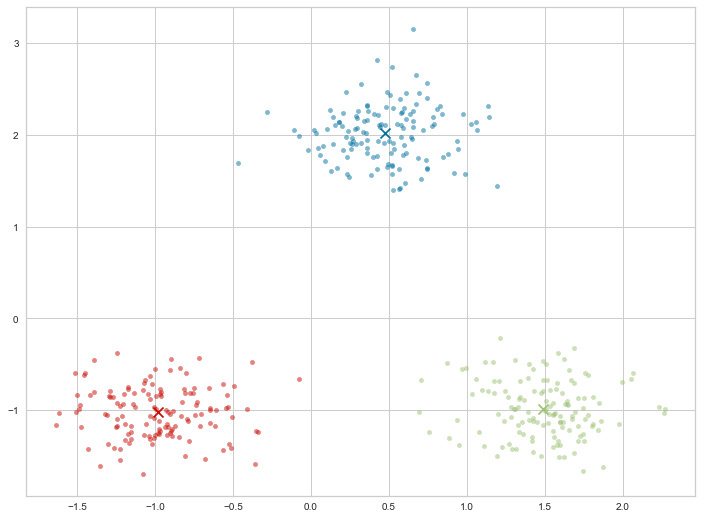

In [203]:
num_clusters = 3
kMeanModel = KMeans(n_clusters=num_clusters)
kMeanModel.fit(Independent_features)
plt.figure(figsize=(12,9))
display_cluster(Independent_features,kMeanModel,num_clusters)

Should we use Three (3) or seven  (7)  clusters?  

- In this case it may be visually obvious that three(3) clusters is better than seven (7).   
- A way of solving this is to plot the **inertia** 

**inertia**: (sum of squared error between each point and its cluster center) as a function of the number of clusters. 

## Elbow Method for Optimal value of k in KMeans

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.  There are two methods to get the optimal numbers of clusters in the given dataset.

 -- **Distortion:** It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
 
-- **Inertia:** It is the sum of squared distances of samples to their closest cluster center

In [204]:
kMeanModel.inertia_

69.31472541359138

###  Inertia Calculation for Optimal Value of K

Write code that calculates the inertia for 1 to 10 clusters, and plot the inertia as a function of the number of clusters.

C:\Users\H177625\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For no of clusters = 1  The Intertia is : 1292.035744846004
For no of clusters = 2  The Intertia is : 475.3478314377629
For no of clusters = 3  The Intertia is : 69.31472541359138
For no of clusters = 4  The Intertia is : 60.65863661922259
For no of clusters = 5  The Intertia is : 52.16289434202929
For no of clusters = 6  The Intertia is : 44.69259123298937
For no of clusters = 7  The Intertia is : 39.37602658683873
For no of clusters = 8  The Intertia is : 34.327262886922135
For no of clusters = 9  The Intertia is : 29.943117378052616
For no of clusters = 10  The Intertia is : 27.719524500663248


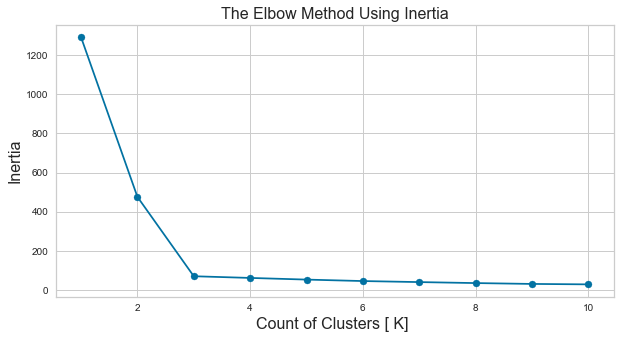

In [250]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    kMeanModel = KMeans(n_clusters=num_clusters)
    kMeanModel.fit(Independent_features)
    inertia.append(kMeanModel.inertia_)
    print("For no of clusters =", num_clusters,
          " The Intertia is :", kMeanModel.inertia_)
    
plt.figure(figsize=(10,5))    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Count of Clusters [ K] ', fontsize=16)
plt.title('The Elbow Method Using Inertia', fontsize=16)
plt.grid(True)
plt.ylabel('Inertia', fontsize=16);
### END SOLUTION

In [206]:
pip install yellowbrick

Recently I discovered a library named Yellowbrick which can help us to plot the Elbow curve with just 1 line of code. 
It is a wrapper around Scikit-Learn and hence integrate well with it.

C:\Users\H177625\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


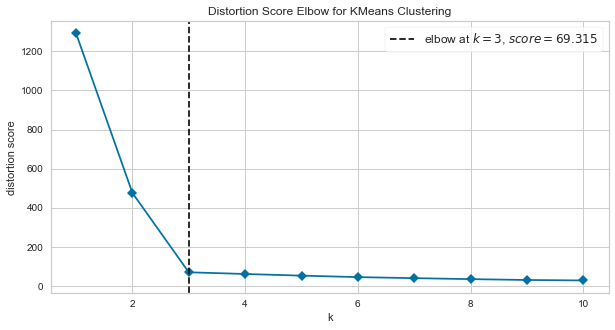

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [248]:
from yellowbrick.cluster import KElbowVisualizer
KMeansmodel = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(KMeansmodel, k=(1,11), timings=False)
plt.figure(figsize=(10,5))
visualizer.fit(Independent_features)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Looking at above elbow plot, we can clearly see the elbow at K=3 and hence that is our optimal number of clusters for this dataset. However, sometimes, the elbow method does not yield a clear indication of optimal values of K and can end up with multiple values showing an elbow. In this case, to find the best K, an evaluation metric like Silhouette Coefficient can be used. The K that will return the highest positive value for the Silhouette Coefficient should be selected. 

## Silhouette Coefficient 
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

 > 1: Means clusters are well apart from each other and clearly distinguished.
 
 > 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
 
> -1: Means clusters are assigned in the wrong way.

Silhouette Score = (b-a)/max(a,b)
-- where
> a= average intra-cluster distance i.e the average distance between each point within a cluster.

> b= average inter-cluster distance i.e the average distance between all clusters.

For no of clusters = 2  The average silhouette_score is : 0.6379
For no of clusters = 3  The average silhouette_score is : 0.8024
For no of clusters = 4  The average silhouette_score is : 0.6505
For no of clusters = 5  The average silhouette_score is : 0.4845
For no of clusters = 6  The average silhouette_score is : 0.3296
For no of clusters = 7  The average silhouette_score is : 0.3505
For no of clusters = 8  The average silhouette_score is : 0.3592
For no of clusters = 9  The average silhouette_score is : 0.352


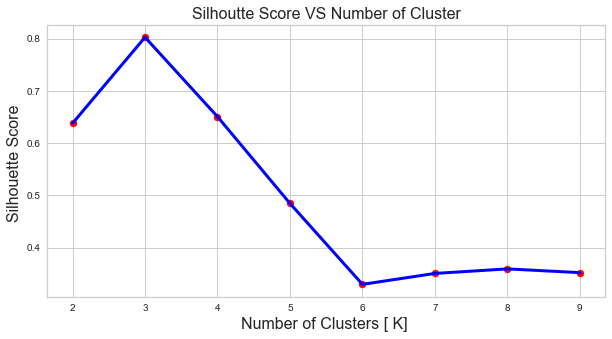

In [247]:
from sklearn.metrics import silhouette_score
silhouette_avg_n_cluster=[]
no_of_clusters = list(range(2,10))
for n_clusters in no_of_clusters:
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(Independent_features)
    #cluster_labels = KMeans.labels_
    # The silhouette_score gives the 
    # average value for all the samples.
    silhouette_avg = silhouette_score(Independent_features, cluster_labels)
    print("For no of clusters =", n_clusters,
          " The average silhouette_score is :", round(silhouette_avg,4))
    
    silhouette_avg_n_cluster.append(silhouette_avg)
plt.figure(figsize=(10,5))  
plt.plot(no_of_clusters,silhouette_avg_n_cluster, color='blue', linewidth=3)
plt.scatter(no_of_clusters,silhouette_avg_n_cluster, color='red', marker="o", s=50)
plt.xlabel('Number of Clusters [ K] ', fontsize=16)
plt.ylabel('Silhouette Score ', fontsize=16)
plt.title('Silhoutte Score VS Number of Cluster', fontsize=16)
plt.grid(True)
### END SOLUTION


### DBSCAN Clustering Algorithm Overview

**DBSCAN** stands for density-based spatial clustering of applications with noise. It is able to find arbitrary shaped clusters and clusters with noise (i.e. outliers).

The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster.
There are two key parameters of **DBSCAN**:

-**eps:**- The distance that specifies the neighborhoods. Two points are considered to be neighbors if the distance between them are less than or equal to eps.

-**minPts:**- Minimum number of data points to define a cluster.


Based on these two parameters, points are classified as core point, border point, or outlier:

-**Core point:**- A point is a core point if there are at least minPts number of points (including the point itself) in its surrounding area with radius eps.

-**Border point:**- A point is a border point if it is reachable from a core point and there are less than minPts number of points within its surrounding area.

-**Outlier:**- A point is an outlier if it is not a core point and not reachable from any core points.

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

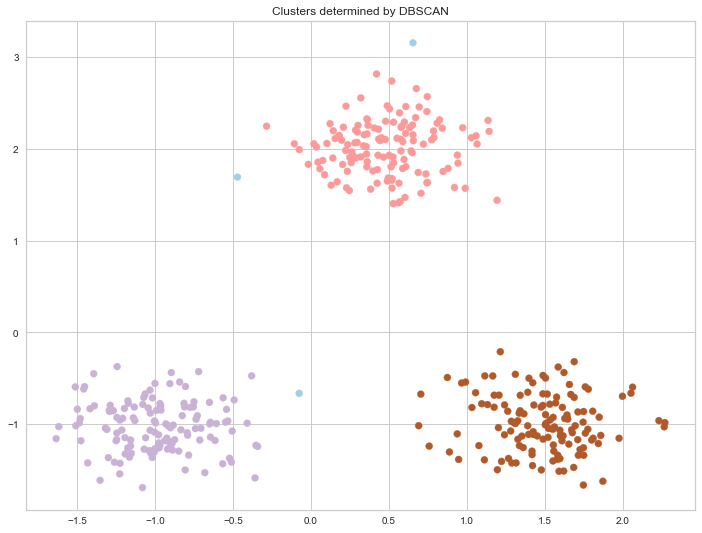

In [209]:
# Create a DBSCAN object and fit the data
from sklearn.cluster import DBSCAN
DB_MOD = DBSCAN(eps=0.4, min_samples=10)
DB_MOD.fit(Independent_features)
labels=DB_MOD.labels_
y_pred = DB_MOD.fit_predict(Independent_features)
plt.figure(figsize=(12,9))
plt.scatter(Independent_features[:,0], Independent_features[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

It was able to detect the outliers (marked with blue). We can access the labels of data points using labels_ attribute. Noise (or outliers) are given -1 label. Let’s check the number of outliers:

In [210]:
### 
from sklearn.metrics import silhouette_score
from sklearn import metrics
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = DB_MOD.labels_[DB_MOD.labels_ == -1].size
print('Estimated number of clusters  : %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(Target_y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(Target_y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(Target_y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(Target_y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(Target_y, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Independent_features, labels))


Estimated number of clusters  : 3
Estimated number of noise points: 3
Homogeneity: 0.996
Completeness: 0.964
V-measure: 0.980
Adjusted Rand Index: 0.989
Adjusted Mutual Information: 0.979
Silhouette Coefficient: 0.747


**Pros and Cons of DBSCAN**

**Pros:-**
-  Does not require to specify number of clusters beforehand-
- Performs well with arbitrary shapes clusters- 
- DBSCAN is robust to outliers and able to detect the outliers- 

**Cons:-**

- In some cases, determining an appropriate distance of neighborhood (eps) is not easy and it requires domain knowledge-

- If clusters are very different in terms of in-cluster densities, DBSCAN is not well suited to define clusters. The characteristics of clusters are defined by the combination of eps-minPts parameters. Since we pass in one eps-minPts combination to the algorithm, it cannot generalize well to clusters with much different densities-

###  Hierarchical clustering: e.g. Agglomerative, Divisive

Hierarchical clustering is another unsupervised learning algorithm that is used to group together the unlabeled data points having similar characteristics. ... The hierarchy of the clusters is represented as a dendrogram or tree structure

**Hierarchical clustering** 

No handles with labels found to put in legend.


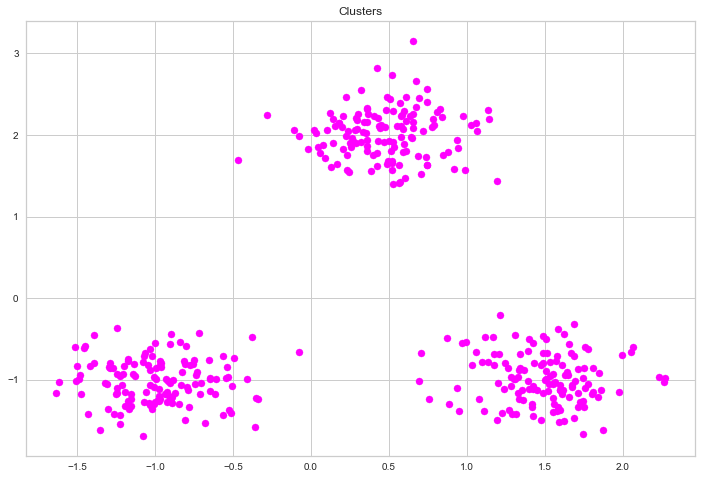

In [211]:
plt.figure(figsize=(12,8))
plt.scatter(Independent_features[:,0], Independent_features[:, 1], s = 50, c = 'magenta')
plt.title('Clusters')
plt.legend()
plt.grid(True)
plt.show()

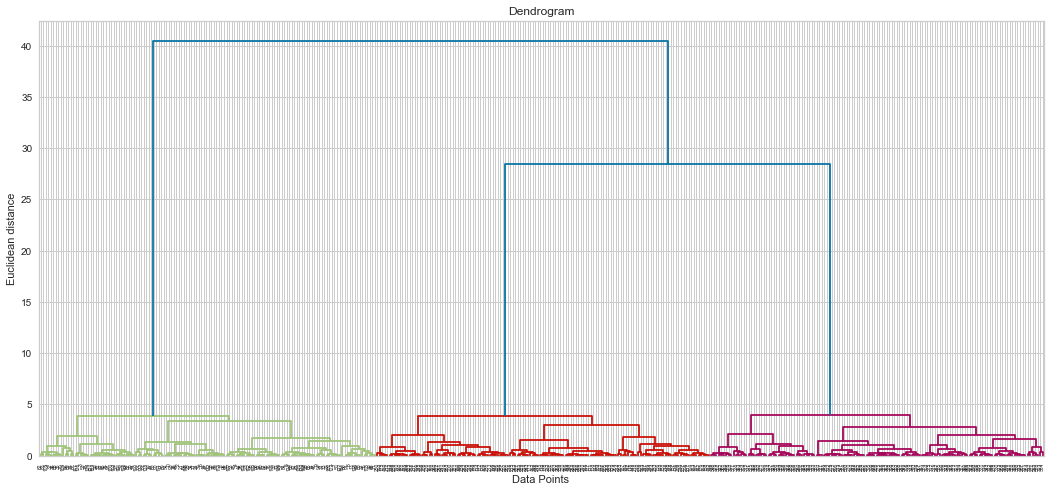

In [212]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(18,8))
dendrogrm = sch.dendrogram(sch.linkage(Independent_features, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points ')
plt.ylabel('Euclidean distance')
plt.show()

In [213]:
from sklearn.cluster import AgglomerativeClustering
HCModel = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
HC_YPred = HCModel.fit_predict(Independent_features)

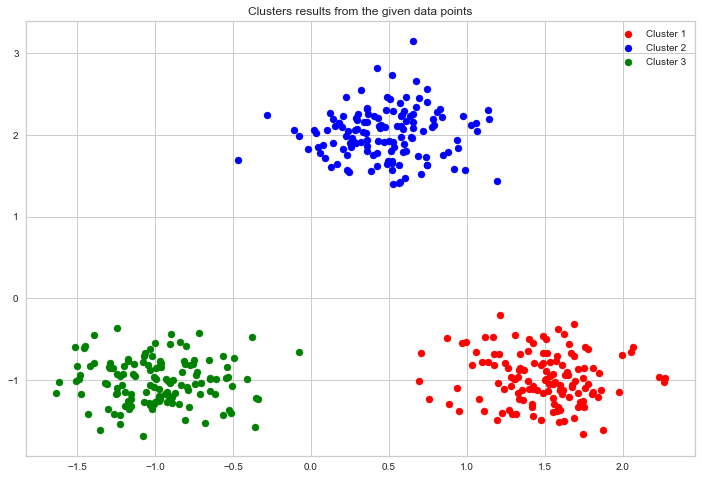

In [214]:
plt.figure(figsize=(12,8))
plt.scatter(Independent_features[HC_YPred == 0, 0], Independent_features[HC_YPred == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(Independent_features[HC_YPred == 1, 0], Independent_features[HC_YPred == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(Independent_features[HC_YPred == 2, 0], Independent_features[HC_YPred == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.title('Clusters results from the given data points')
plt.legend()
plt.grid(True)
plt.show()